---
# <font color="#CA3532">Práctica 3 de Neurocomputación</font>
### Curso 2021-2022
### Escuela Politécnica Superior – Universidad Autónoma de Madrid

---

Fechas de entrega:
- Grupo 2462: lunes 16 de mayo de 2022
- Grupo 2461: martes 17 de mayo de 2022

---

Última actualización: 31-03-2022

---

*Sesión 1*:

- Esta práctica está centrada en [Keras](https://keras.io/).

- Keras es una biblioteca de redes neuronales de código abierto, diseñada para la experimentación con redes neuronales profundas. Keras es modular, extensible y fácil de usar.

- Keras puede usar distintos motores. Aquí se usará con TensorFlow.



In [ ]:
### Incluid vuestros nombres, pareja y grupo aquí:
estudiantes = [{'nombre': 'Zhijie Qian', 'pareja': 'P05', 'grupo': '2461'},
               {'nombre': 'Santo Saenz Ferrero', 'pareja': 'P05', 'grupo': '2461'}]


### <font color="#CA3532">Importación de bibliotecas</font>

TensorFlow 2.0 incluye oficialmente Keras.

In [1]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

### <font color="#CA3532">Datos del problema</font>

El problema consiste en predecir si va a haber una erupción solar (*solar flares*) en ciertas regiones solares en función de las características de la región solar. El conjunto datos y la caracterización de sus atributos puede encontrarse en https://www.openml.org/d/40702. El siguiente fragmento de código permite cargar estos datos.

In [2]:
dataset_url = 'https://www.openml.org/data/get_csv/4965303/flare.arff' 

dataset = np.genfromtxt(dataset_url, delimiter=',', skip_header=1)

### -------------------------------------------------------------------------------
### Dividid los ejemplos en atributos y clases. Guardad el número de atributos.
### -------------------------------------------------------------------------------

x = dataset[:,:-1]
x_size = x.shape[1]
y = dataset[:,-1]

In [3]:
# Resultados de la división y el número de atributos

print('Ejemplo 0:', x[0], y[1])
print('Atributos:', x_size)
print('Clases:', np.unique(y))
print('Recuento de clases:', y.tolist().count(0), y.tolist().count(1))
print('Examplos:', len(x))

Ejemplo 0: [5. 4. 3. 1. 3. 1. 1. 2. 1. 1.] 0.0
Atributos: 10
Clases: [0. 1.]
Recuento de clases: 884 182
Examplos: 1066


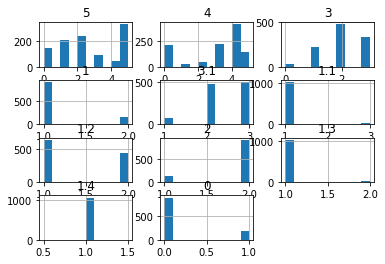

In [4]:
# create pairwise scatter plots of numeric input variables
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# load the csv file as a data frame
df = read_csv(dataset_url, header=1)

# histograms of all variables 
df.hist()
pyplot.show()

In [5]:
print(df.head(5))

   5  4  3  1  3.1  1.1  1.2  2  1.3  1.4  0
0  1  3  1  1    2    1    1  2    1    1  0
1  2  3  2  1    3    1    1  2    1    1  1
2  5  4  3  2    2    1    2  2    1    1  0
3  1  4  2  1    3    1    1  2    1    1  0
4  1  4  2  1    2    1    2  2    1    1  0


In [6]:
print(df.describe())

                 5            4            3            1          3.1  \
count  1065.000000  1065.000000  1065.000000  1065.000000  1065.000000   
mean      2.625352     2.957746     2.034742     1.153991     2.400939   
std       1.844397     1.703904     0.806293     0.361109     0.620604   
min       0.000000     0.000000     0.000000     1.000000     1.000000   
25%       1.000000     2.000000     2.000000     1.000000     2.000000   
50%       2.000000     4.000000     2.000000     1.000000     2.000000   
75%       5.000000     4.000000     3.000000     1.000000     3.000000   
max       5.000000     5.000000     3.000000     2.000000     3.000000   

               1.1          1.2            2          1.3     1.4            0  
count  1065.000000  1065.000000  1065.000000  1065.000000  1065.0  1065.000000  
mean      1.059155     1.404695     1.875117     1.025352     1.0     0.170892  
std       0.320469     0.491063     0.330741     0.157266     0.0     0.376591  
min      

### Eliminacion de columnas
Visualizando las medias y las desviaciones estándares, la última columna no nos aporta información puesto que siempre su valor se mantiene inmutable en 1, por ello se decide eliminar. Este detalle también se puede ver en la página https://www.openml.org/search?type=data&sort=runs&id=40702&status=active apartado de análisis, donde la columna Area_of_the_largest_spot es irrelevante. 

También se elimina la columna Area que es la columna 1.3 del df.describe() donde apenas hay datos de valor 2 y se vuelve a tener una desviación mínima.

Finalmente, la columna Become_complex se puede eliminar o no, que es la columna 2 del df.describe(). Sin embargo hemos decidido eliminar esta columna por 2 motivos, el primero es que con este atributo, aunque en ocasiones se genera unos resultados buenos, también se generan en muchas ocasiones modelos con resultados aleatorios, en cambio, quitando este atributo, los resultados para los diferentes modelos en general son mejores. El segundo motivo se trata del descrito en la página https://www.openml.org/search?type=data&sort=runs&id=40702&status=active apartado de análisis, la importancia con RandomForest es muy bajo, siendo un atributo sin mucha importancia.

Para este apartado tampoco se normalizan los datos puesto que los estos son categóricos.

In [7]:
x = dataset[:,:-2]
df = read_csv(dataset_url, header=1)
del df['1.4']
x.shape

(1066, 9)

In [8]:
df.describe()

,5,4,3,1,3.1,1.1,1.2,2,1.3,0
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,2.625352,2.957746,2.034742,1.153991,2.400939,1.059155,1.404695,1.875117,1.025352,0.170892
std,1.844397,1.703904,0.806293,0.361109,0.620604,0.320469,0.491063,0.330741,0.157266,0.376591
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000
50%,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,5.000000,4.000000,3.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000
max,5.000000,5.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000


In [9]:
# Normalizad los datos (si es necesario)
# Los datos se encuentran en diferentes intervalos de valores por lo que el modelo puede tender 
# a ponderar más los datos con rangos de valores mayores, por ello se ha decidico escalar los 
# datos de la forma que se nos proporciona.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.transform(x)

In [10]:
print(x.shape)

(1066, 9)


### Alternativa, OneHotEncoder
En el apartado anterior se han eliminado 3 columnas, pero aun así, los resultados no son tan buenos como se esperaba, por ello, la característica Class_code y Largest_spot_code, las cuales son las 2 primeras columnas, como tienen 6 valores cada uno y además una media y una desviación alta, se van a codificar con OneHot encoder.

A partir de la codificación One Hot se transforma el valor de una columna con valores en un determinado conjunto, a un vector con valor 1 para el índice que se corresponde al valor del registro, mientras que para el resto valor 0, consiguiendo que el modelo lo trate como una variable categórica en el que cada valor es independiente del resto. Esto a priori tiene sentido debido a la alta desviación de estas características algo propio de una variable categórica

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x = dataset[:,:-2]
ct = ColumnTransformer([("columns", OneHotEncoder(), [0,1])], remainder = 'passthrough')
x = ct.fit_transform(x)
x[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 3., 1., 3., 1., 1.,
       2., 1.])

In [12]:
x.shape

(1066, 19)

### <font color="#CA3532">Definición del modelo</font>

- Cada capa del modelo lleva definidas una serie de propiedades (tamaño, función de activación, conectividad, etc.). 

- Usaremos el modelo secuencial que Keras para crear una red neuronal multicapa con propagación hacia adelante.



In [13]:
# Definid el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Añadir la capas completamente conectadas que consideréis al modelo
### -------------------------------------------------------------------------------
nn.add(Dense(12, activation="sigmoid"))
nn.add(Dense(12, activation="sigmoid"))
nn.add(Dense(1, activation="sigmoid"))

### <font color="#CA3532">Compilación de la red neuronal</font>

- La compilación es la operación que contruye la red neuronal.

- La compilación incluye aspectos que se tendrán en cuenta en el entrenamiento de la red neuronal.

- En la secciones de abajo encontraréis enlaces a la documentación oficial donde podréis encontrar información sobre las distintas estrategias de cada uno de los aspectos.

- También es posible definid vuestras propias funciones.

#### <font color="#CA3532">Optimizador</font>

El optimizador es la estrategia para calcular las correcciones de los pesos.

https://keras.io/api/optimizers/


#### <font color="#CA3532"> Función de error (*Loss function*)</font>

La función de error calcula la cantidad que el modelo debe minimizar durante el entrenamiento.

https://keras.io/api/losses/

#### <font color="#CA3532">Métricas</font>

Una métrica es una función que juzga la actuación del modelo. Son funciones similares a las funciones de error pero, a diferencia de estas, no se aplican durante el entrenamiento, sino sobre los resultados. Aprende al menos el significado y las diferencias de las métricas *accuracy*, *precision*, *recall* y *AUC*. También pueden usarse las funciones de error como metricas.

https://keras.io/api/metrics/

In [14]:
# Compilación

### -------------------------------------------------------------------------------
### Compilad vuestro modelo de red neuronal
### -------------------------------------------------------------------------------

metrics = [
            #keras.metrics.TruePositives(name='tp'),
            #keras.metrics.FalsePositives(name='fp'),
            #keras.metrics.TrueNegatives(name='tn'),
            #keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='ACC'),
            keras.metrics.Precision(name='Prec'),
            keras.metrics.Recall(name='Rec'),
            keras.metrics.AUC(name='AUC'),
            #keras.metrics.AUC(name='PRC', curve='PR'),
          ]

nn.compile(optimizer='SGD', loss="mse", metrics=metrics)
# nn.compile(optimizer='Adam', loss="binary_crossentropy", metrics=metrics)

### <font color="#CA3532">Conjuntos de entrenamiento y validación</font>

Usaremos el 80 % de los datos para entrenamiento y el 20 % para validación. Usaremos también la técnica de muestreo estratificado (también están permitidas otras formas de validación). Averigua qué es y para qué sirve.

In [15]:
# Contrucción de los conjuntos de entrenamiento y validación

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.2) 

In [16]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 707, 1.0: 145}

In [17]:
unique, counts = np.unique(y_val, return_counts=True)
dict(zip(unique, counts))

{0.0: 177, 1.0: 37}

### Respuesta
A partir de la técnica de muestreo estratificado los datos se dividen por una característica común, en este caso por la clase objetivo, por ello los datos se obtienen en train y validación de forma equilibrada teniendo en ambos proporcion especificada por test_size para cada clase objetivo

Un ejemplo sería que si y tiene 20% de 0s y 80% de 1s, el ramdon split realizado también asegurá que haya 20% de 0s y 80% de 1s.

### <font color="#CA3532">Visualización de resultados</font>

Para la visualización de los resultados utilizaremos gráficas con la evolución de la función de pérdida y las métricas en cada época del entrenamiento, tanto para los datos de entrenamiento como para los de validación.

También obtendremos la matriz de confusión y alguna métricas sobre cada clase del problema. Observaremos especialmente la medida macro-F1.

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

def show_metrics(history):
    for metric in history.history.keys():
        if not metric.startswith('val_'):
            plt.plot(history.history[metric], label=metric)
            plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
            plt.title(metric)
            plt.ylabel('')
            plt.xlabel('Epoch')
            plt.legend(loc="upper left")
            plt.show()

### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>

El método "fit" entrena una red neuronal con los datos que se le proporcionen.

https://keras.io/api/models/model_training_apis/#fit-method

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                240       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________





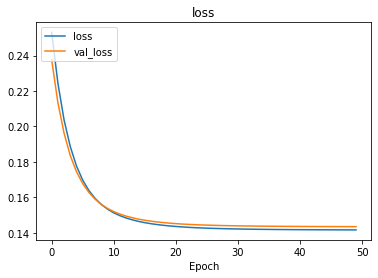

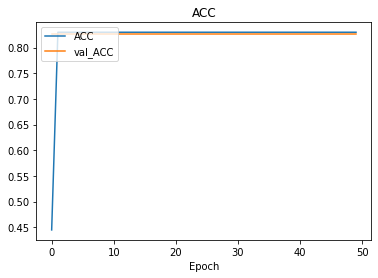

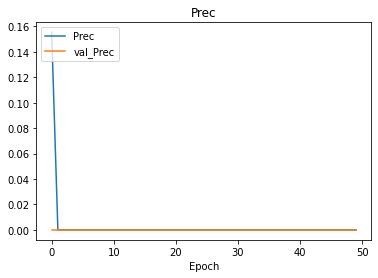

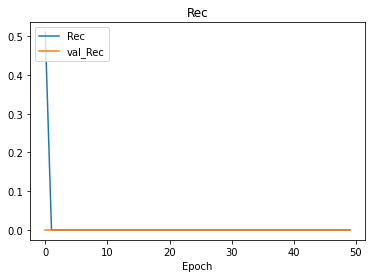

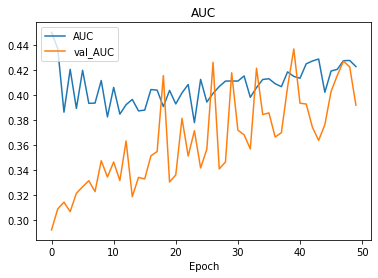

[[177   0]
 [ 37   0]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       177
         1.0       0.00      0.00      0.00        37

    accuracy                           0.83       214
   macro avg       0.41      0.50      0.45       214
weighted avg       0.68      0.83      0.75       214



In [19]:
# Entrenamiento

epochs = 50

history = nn.fit(x_train, y_train, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Predicciones del conjunto de evaluación

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

# Detalles de la red neuronal

nn.summary()
print('\n\n')

# Visualización de las métricas 

show_metrics(history)

# Matriz de confusión

print(confusion_matrix(y_val, y_pred))

# Observa la medida macro-f1 del siguiente informe

print(classification_report(y_val, y_pred, zero_division=0))


### <font color="#CA3532">Entrenamiento de la red neuronal y evaluación</font>
Como podrás haber observado en problema no está balanceado (o está bastante desequilibrado), porque el número de ejemplos de cada clase es muy diferente.

Existen varias técnicas para abortar este tipo de problemas. Una de ellas consiste seleccionar un subconjunto de datos equilibrados en el que las dos clases esten representadas en la misma proporción.


## Nota
Para esta sección, sólo vamos a comentar las técnicas que utilizamos y para visualizar, dirige a siguientes notebook que son pruebas rápidas de cada técnica aplicando OneHotEncoder o no.

- Normal [link](Neuro_P3_normal.ipynb)
- OneHotEncoder [link](Neuro_P3_one_hot.ipynb)

In [20]:
!pip3 install imbalanced-learn

In [21]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from collections import Counter

### Alternativa, separar datos para que haya misma cantidad de clase 0 y 1
El problema de esta técnica es que se esta desperdiciando los datos que se deshechan de la clase mas numerosa para igualar su numero de datos a la menos numerosa. Si se lleva esta situación al extremo, si existiesen 10k datos de clase 0 y sólo 100 datos de clase 1, no se detectarían ciertos valores objetivos que se detectan con características que tienen un pequeño grupo de los datos, que podrían haber sido justamente deshechados.

Para realizar esta técnica sólo se va a despreciar los datos del training, para que se entrena de forma equilibrada y luego se valida el Test con su desequilibro de datos, pero desequilibrio real que existe, para captar con mayor exactitud la precisión del modelo al tener más datos de test

#### RandomUnderSampler
Esta técnica se aplica de forma sencilla con la clase imblearn.under_sampling.RandomUnderSampler. Esta para un conjunto de datos los equilibra en número en función de la clase objetivo para lo que elimina registros de las clases mayoritarias, escogiendo de forma aleatorio los registros de estas clases, hasta dejar un conjunto de registros igual en número para las distintas clases objetivos.

In [22]:
undersample = RandomUnderSampler()
X_under_train, y_under_train = undersample.fit_resample(x_train, y_train)
print(Counter(y_under_train))

Counter({0.0: 145, 1.0: 145})


#### EditedNearestNeighbours
Esta técnicaa eliminar registros haciendo uso de k-vecinos cercanos, a partir de la que se eliminan registros cercanos a la frontera de decisión para distinguir entre una clase y otra

In [23]:
enn = EditedNearestNeighbours()
X_under_train, y_under_train = enn.fit_resample(x_train, y_train)
print(Counter(y_under_train))

Counter({0.0: 439, 1.0: 145})


#### TomekLinks
Esta se trata de otra técnica para la eliminación de registros, en ella se hace uso de los enlaces de Tomek los cuales son enlaces entre registros de diferentes clases que están muy próximas. Para estos registros de la clase mayoritaria con un valor de distancia pequeña en el enlace, se eliminan 

In [24]:
tl = TomekLinks()
X_under_train, y_under_train = tl.fit_resample(x_train, y_train)
print(Counter(y_under_train))

Counter({0.0: 703, 1.0: 145})


### Alternativa, aumentar los datos para que haya la misma cantidad de registros de la clase de 0 y 1
La técnica planteada es parecido a la de la sección anterior, solo que en vez de reducir el dataset para que haya el mismo número de 0s y 1s, se va a aumentar los registros de la clase con menor número de datos para que el número de registros de ambas clases se encuentre equilibrado. 

Existe 2 enfoques, crear más copias existentes o crear nuevas copias segun un determinado criterio. Para el primer enfoque, el problema que genera es que existe redundancia de datos. Para el segundo enfoque el problema es que se crean datos que quizá no sean válidos y que no se ajustan con exactitud a los que se obtendrían en un entorno de produccón. 

El aspecto positivo de esta técnica, es que no se está desperdiciando datos y dando al modelo una cantidad de datos equilibrada para las diferentes clases por lo que no sobre estima unas sobre otras.


#### RandomOverSampler
El primer enfoque se desarrolla de manera sencilla con la clase imblearn.over_sampling.RandomOverSampler. Esta para la clase minoritaria escoge registros de manera aleatoria y los introduce al conjunto de registros hasta que existe un equilibrio de registros entre clases

In [25]:
oversample = RandomOverSampler()
X_over_train, y_over_train = oversample.fit_resample(x_train, y_train)
print(Counter(y_over_train))

Counter({1.0: 707, 0.0: 707})


#### SMOTE y ADASYN

Estas técnicas generan muestras de la clase minoritaria a partir de la interpolación. La diferencia entre ambas técnicas se encuentra en los registros que se hacen uso para realizar la interpolación. ADASYN se centra en generar muestras, que se encuentran junto a las muestras originales que se clasifican erróneamente, utilizando una clasificación k-Vecinos más cercanos. Por su parte el algoritmo SMOTE no hace ninguna distinción entre muestras para ser clasificadas utilizando la regla de vecinos más cercanos.

In [26]:
sm = SMOTE()
X_over_train, y_over_train = sm.fit_resample(x_train, y_train)
print(Counter(y_over_train))

Counter({1.0: 707, 0.0: 707})


ada = ADASYN()
X_over_train, y_over_train = ada.fit_resample(x_train, y_train)
print(Counter(y_over_train))

### Uso de class_weight pero con paquete que nos proporciona

Otra técnica consiste en asignar un peso a cada clase para que lo tenga en cuenta en algoritmo de entrenamiento.
Aprende lo que hace el parámetro ```class_weight``` de ```fit``` (https://keras.io/api/models/model_training_apis/#fit-method) y explícalo.

Vuelve a entrenar considerando distintos pesos y observa como varía el resultado de la matriz de confusión. Si es posible, intenta conseguir un modelo mejor y describe los resultados alcanzados.

In [28]:
### -------------------------------------------------------------------------------
### Assigna diferentes pesos a cada una de las clases
### -------------------------------------------------------------------------------

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
print(class_weights)

{0: 0.6025459688826026, 1: 2.9379310344827587}


El modelo para el atributo class_weights lo que hace es mutiplicarlo por el error obtenido en la función de error dependiendo de la clase objetivo, con el fin de que el optimizador, al computar los errores de ciertas clases de forma mayor, tenderá a minimizar el error en esas clases si tienen un weight en class_weights alto.

### Aplicar todas las ténicas a la vez.

#### RandomUnderSampler + RandomOverSampler

La idea es que vamos a intentar reducir algunos datos de la clase mayoritaria pero no eliminar todas sino sólo algunas de ellas para no perder mucha información y vamos a ampliar datos de la clase minoritaria para compensar un poco.
Imaginando que tuvieramos un desbalanceo de 1:100, aplicamos oversampling para tener un desbalanceo de 1:10 y luego aplicamos undersampling para eliminar dato y tener un desbalanceo de 1:2.

Finalmente, como seguimos teniendo un desbalanceo de datos, usamos class_weight para ajustar.

In [29]:
print(Counter(y_train))

oversample = RandomOverSampler(sampling_strategy=0.4)
X_over_train, y_over_train = oversample.fit_resample(x_train, y_train)
print(Counter(y_over_train))

undersample = RandomUnderSampler(sampling_strategy=0.5)
X_ajust_train, y_ajust_train = undersample.fit_resample(X_over_train, y_over_train)
print(Counter(y_ajust_train))

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_ajust_train), y=y_ajust_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
print(class_weights)

Counter({0.0: 707, 1.0: 145})
Counter({0.0: 707, 1.0: 282})
Counter({0.0: 564, 1.0: 282})
{0: 0.75, 1: 1.5}


#### SMOTE + EditedNearestNeighbours
 
Estas técnicas se combinan con el fin de reducir el numero de muestras de la clase mayoritaria haciendo uso de EditedNearestNeighbours eliminando los registros de esta clase que se encuentran en la frontera de decisión, y conseguir más muestras de la clase minoritaria con SMOTE como a partir de interpolación

In [30]:
smoteen = SMOTEENN()
X_ajust_train, y_ajust_train = smoteen.fit_resample(x_train, y_train)
print(Counter(y_ajust_train))

Counter({0.0: 453, 1.0: 387})


#### SMOTE + Tomek

Estas técnicas se combinan con el fin de reducir el numero de muestras de la clase mayoritaria haciendo uso de Tomek eliminando los registros de esta clase que se encuentran con enlaces Tomek con un valor de distancia muy pequeño, y conseguir más muestras de la clase minoritaria con SMOTE como a partir de interpolación


In [31]:
smtomek = SMOTETomek(sampling_strategy='all')
X_ajust_train, y_ajust_train = smtomek.fit_resample(x_train, y_train)
print(Counter(y_ajust_train))

Counter({1.0: 707, 0.0: 707})


### <font color="#CA3532">Optimización del diseño de la red neuronal</font>

- Cambiad la arquitectura de la red neuronal introduciendo más capas y neuronas para conseguir mejores resultados:
 - Añadid más capas o diferente tipo de capas.
 - Cambiad las funciones de activación.
 - Cambiad la función de error o el optimizador.

- Utilizad ```tuner``` para la búsqueda de estos hiperparámetros (https://keras.io/keras_tuner/).

Para esta parte, tambien se dirige a siguientes notebooks para ver los resultados, puesto que son demasiado largos.
Sólo vamos a utilizar la versión OneHotEncoder puesto da mejores resultados tanto en el Train como en el Test.
También se usa la ténica de SMOTE + EditedNearestNeighbours ya que genera mejores resultados.

- OneHot_MSE [link](Neuro_P3_onehot_mse.ipynb)
- OneHot_Entropy [link](Neuro_P3_onehot_entropy.ipynb)

Al principio hemos puesto un número aleatorio de 1 a 100 neuronas para cada capa, pero hemos dado cuenta de que esto no funciona para nada, para ello, hemos decidido siguientes configuraciones para probar.
- 1 capa
    - hp.Int('units', 5, 40)
- 2 capas
    - hp.Int('units', 5, 40)
    - hp.Int('units', 4, 20)
- 3 capas
    - hp.Int('units', 5, 40)
    - hp.Int('units', 4, 20)
    - hp.Int('units', 3, 10)
- 4 capas
    - hp.Int('units', 5, 40)
    - hp.Int('units', 4, 20)
    - hp.Int('units', 3, 10)
    - hp.Int('units', 2, 5)
- 5 capas
    - hp.Int('units', 5, 40)
    - hp.Int('units', 4, 20)
    - hp.Int('units', 3, 10)
    - hp.Int('units', 2, 5)

La idea de esto es que primero vamos a intentar llevar a un espacio de dimensión mayor y luego poco a poco reduciendo esta dimensión. Como esto es aletorio, también estaremos buscando una red que puede aumentar dimensión, luego bajar, luego aumentar etc. Con todo esto, intentaremos buscar una red que maximice F1-score de clase 0, en el caso de empate, se busca un mejor weighted avg de F1-score.

### <font color="#CA3532">Diseño final de la red neuronal</font>
Define ahora tu modelo final y muestra los resultados de su evaluación.

In [32]:
### ---------------------------------------------------------------------------
### Modelo final y evaluación
### ---------------------------------------------------------------------------

nn_final = Sequential()
nn_final.add(Dense(x_size, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.add(Dense(1, activation="sigmoid"))
nn_final.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), metrics=[tf.keras.metrics.AUC(from_logits=True)], loss="mse")

nn_final.fit(x=x_train, y=y_train, epochs=epochs, class_weight=class_weights)
y_pred = nn_final.predict(x_val)
y_pred = y_pred > 0.5

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, zero_division=0))

Epoch 1/50
27/27 [==============================] - 1s 1ms/step - loss: 0.1953 - auc: 0.4968
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.1835 - auc: 0.4964
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.1806 - auc: 0.5574
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.1785 - auc: 0.6526
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.1754 - auc: 0.7291
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.1731 - auc: 0.7078
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.1709 - auc: 0.7221
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.1684 - auc: 0.7315
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.1659 - auc: 0.7491
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.1636 - auc: 0.7395
Epoch 11/50
27/27 [==============================] - 0s 1ms/step - lo